What is the VTR for users whose enrolled in a course w/in 1-2 weeks of the course start date, for instructor paced courses?

Boilerplate Connection Setup
---

In [1]:
%load_ext edx_jupyter

The edx_jupyter extension is already loaded. To reload it, use:
  %reload_ext edx_jupyter


In [2]:
%vertica SELECT 'Connected'

OPS_WAREHOUSE_PASSWORD: ········


,?column?
0,Connected


In [11]:
%%vertica -> verifications_by_start_diff

SELECT
    DATEDIFF('day', c.course_start_date, duc.first_enrollment_time) AS enroll_diff,
    SUM(
        CASE
            WHEN (
                duc.first_verified_enrollment_time IS NOT NULL
                AND ABS(DATEDIFF('day', duc.first_enrollment_time, duc.first_verified_enrollment_time)) < 3
            ) THEN 1
            ELSE 0
        END
    ) AS verified_on_enroll,
    SUM(
        CASE
            WHEN (
                duc.first_verified_enrollment_time IS NOT NULL
                AND ABS(DATEDIFF('day', duc.first_enrollment_time, duc.first_verified_enrollment_time)) > 3
            ) THEN 1
            ELSE 0
        END
    ) AS verified_after_enroll,
    COUNT(*) AS total
FROM
    production.d_user_course AS duc
JOIN business_intelligence.course_master AS c
    ON duc.course_id = c.course_id
    AND c.pacing_type = 'instructor_paced'
WHERE duc.first_enrollment_time < c.course_verification_end_date
GROUP BY 1
HAVING DATEDIFF('day', c.course_start_date, duc.first_enrollment_time) BETWEEN -25 AND 25
ORDER BY 1

In [ ]:
verifications_by_start_diff

In [ ]:
verifications_by_start_diff['vtr_on_enroll'] = verifications_by_start_diff.verified_on_enroll / verifications_by_start_diff.total * 100
verifications_by_start_diff['vtr_after_enroll'] = verifications_by_start_diff.verified_after_enroll / verifications_by_start_diff.total * 100


In [ ]:
verifications_by_start_diff

In [ ]:
%vertica select datediff('day', '2017-07-20'::DATE, '2017-07-18'::DATE)

In [4]:
%%vertica -> df

SELECT
    DATEDIFF('day', ca.course_start_date, duc.first_enrollment_time) AS enroll_days_after_start,
    CASE
        WHEN duc.first_verified_enrollment_time IS NULL THEN DATEDIFF('day', duc.first_enrollment_time, NOW())
        ELSE DATEDIFF('day', duc.first_enrollment_time, duc.first_verified_enrollment_time)
    END AS duration,
    duc.first_verified_enrollment_time IS NOT NULL AS enrolled,
    COUNT(*)
FROM
    production.d_user_course AS duc
JOIN business_intelligence.course_availability AS ca
    ON duc.course_id = ca.course_id
    AND ca.course_pacing_type = 'instructor_paced'
    AND ca.date = NOW()::DATE
    AND ca.course_start_date BETWEEN '2012-01-01'::DATE AND '2020-01-01'::DATE
    AND duc.first_enrollment_time < ca.course_verification_end_date
GROUP BY 1, 2, 3
ORDER BY 1, 2, 3

In [5]:
df

,enroll_days_after_start,duration,enrolled,COUNT
0,-784,1267,False,8
1,-783,1266,False,59
2,-782,1265,False,1
3,-780,1263,False,30
4,-779,1262,False,58
5,-778,1261,False,63
6,-777,1260,False,59
7,-776,762,True,1
8,-776,1259,False,51
9,-775,1258,False,38


In [6]:
import pandas as pd
import itertools
df2 = pd.DataFrame(
    list(itertools.chain.from_iterable([(r[1], r[2], r[3])]*r[4] for r in df.itertuples())),
    columns=df.columns[:3]
)

In [7]:
df2

,enroll_days_after_start,duration,enrolled
0,-784,1267,False
1,-784,1267,False
2,-784,1267,False
3,-784,1267,False
4,-784,1267,False
5,-784,1267,False
6,-784,1267,False
7,-784,1267,False
8,-783,1266,False
9,-783,1266,False


In [8]:
%matplotlib inline

In [9]:
!sudo pip install ggplot

    100% |████████████████████████████████| 2.2MB 703kB/s ta 0:00:01


stat_identity
stat_identity


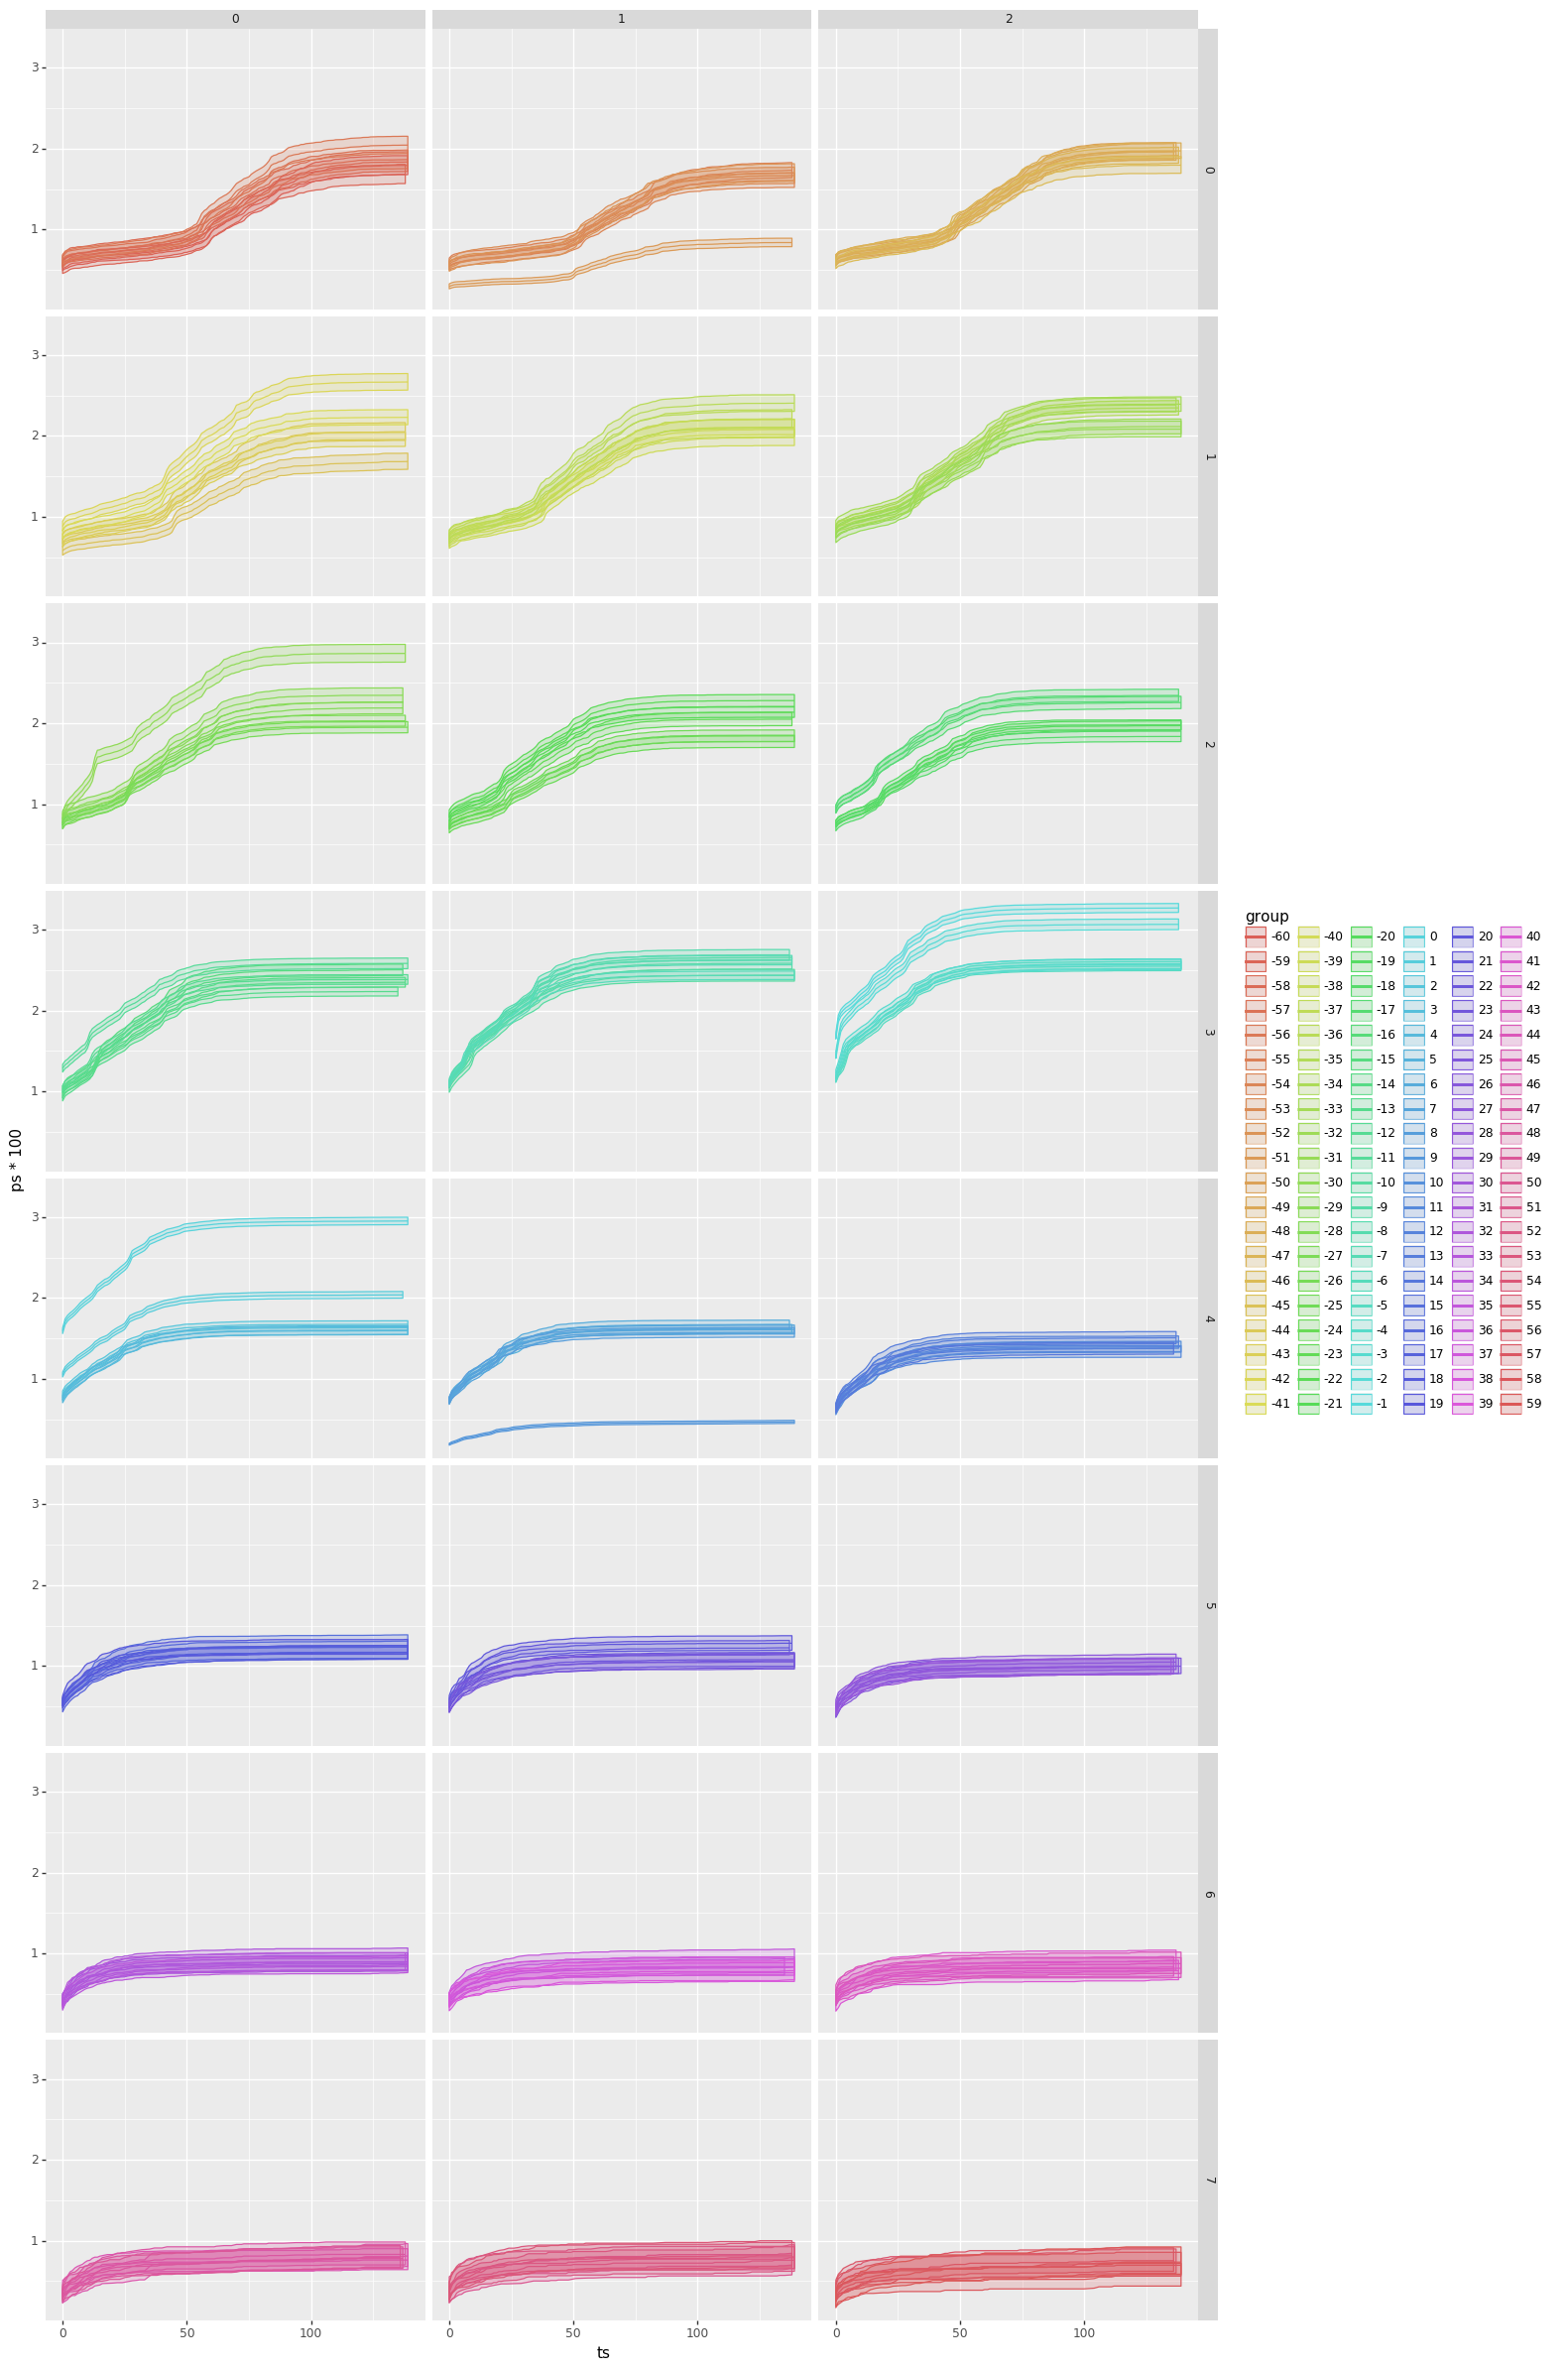

<ggplot: (8760764801109)>

In [13]:
import pandas as pd
from lifelines import KaplanMeierFitter
from plotnine import *
import plotnine
#from ggplot import *
import seaborn
groups = range(-60, 60)

T = df2.duration
E = df2.enrolled

colors = itertools.cycle(seaborn.color_palette('hls', 5))

plot_num = 0
baseax = None
data = pd.DataFrame(columns=['ts', 'ps', 'ps_hi', 'ps_lo', 'group', 'column', 'row'])

for idx, (group, color) in enumerate(zip(groups, colors)):
    if idx % 5 == 0:
        plot_num += 1
        
    kmf = KaplanMeierFitter()
    ix = (df2.enroll_days_after_start == group)
    
    group_label = str(group)
    kmf.fit(T[ix], event_observed=E[ix], label=group_label)
    
    ts = kmf.survival_function_.index.values
    ps = 1.0 - kmf.survival_function_[group_label].values
    ps_hi = 1.0 - kmf.confidence_interval_['{}_lower_0.95'.format(group_label)].values
    ps_lo = 1.0 - kmf.confidence_interval_['{}_upper_0.95'.format(group_label)].values
    
    per_row = 15
    per_cell = 5
    row = idx // per_row
    column = idx % per_row // per_cell
    data = data.append(pd.DataFrame({
        'ts': ts,
        'ps': ps,
        'ps_hi': ps_hi,
        'ps_lo': ps_lo,
        'group': group,
        'column': column,
        'row': row,
    }, columns=data.columns))
    
display(
    ggplot(data[data.ts < 140], aes(
        x='ts',
        y='ps * 100',
        ymin='ps_lo * 100',
        ymax='ps_hi * 100',
        color='group',
        fill='group',
    ))
    + facet_grid('row~column')
    + geom_line()
    + geom_ribbon(alpha=0.2)
    + theme(figure_size=(15, 30))
)